## Архитектура системы решения задачи обучения с учителем

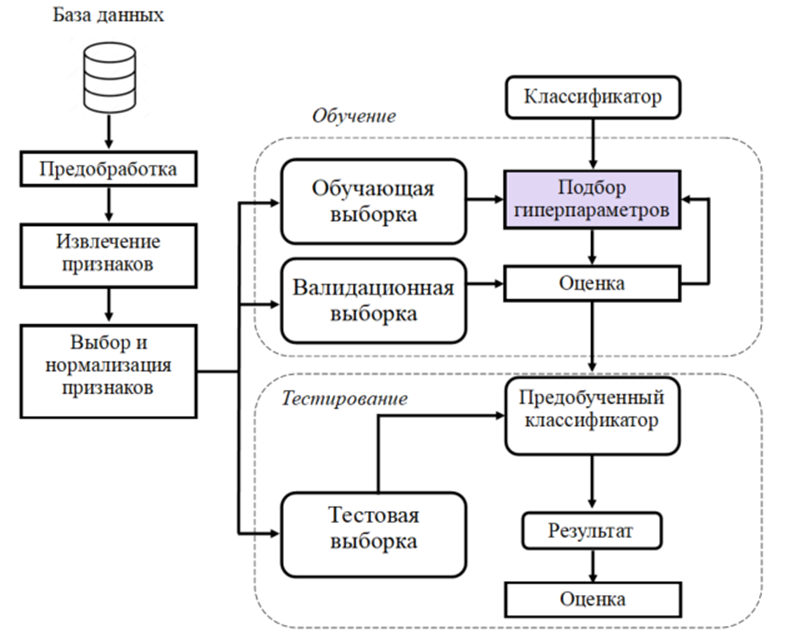

## Перекрестная проверка с откладыванием данных

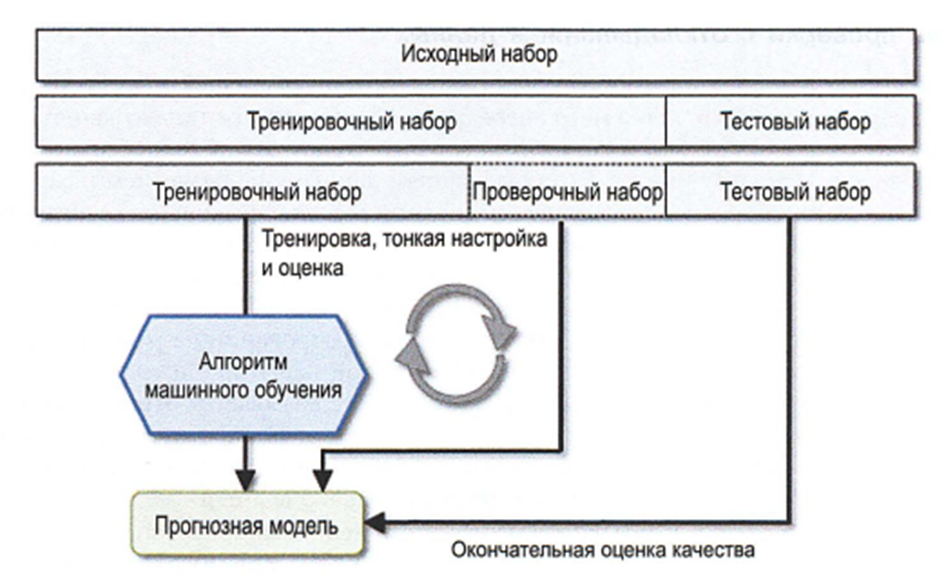

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
#генерация набора данных
X, y = np.arange(60).reshape((30, 2)), range(30)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [4]:
print(len(y_train))
print(len(y_val))
print(len(y_test))

21
4
5


## K-блочная кросс валидация

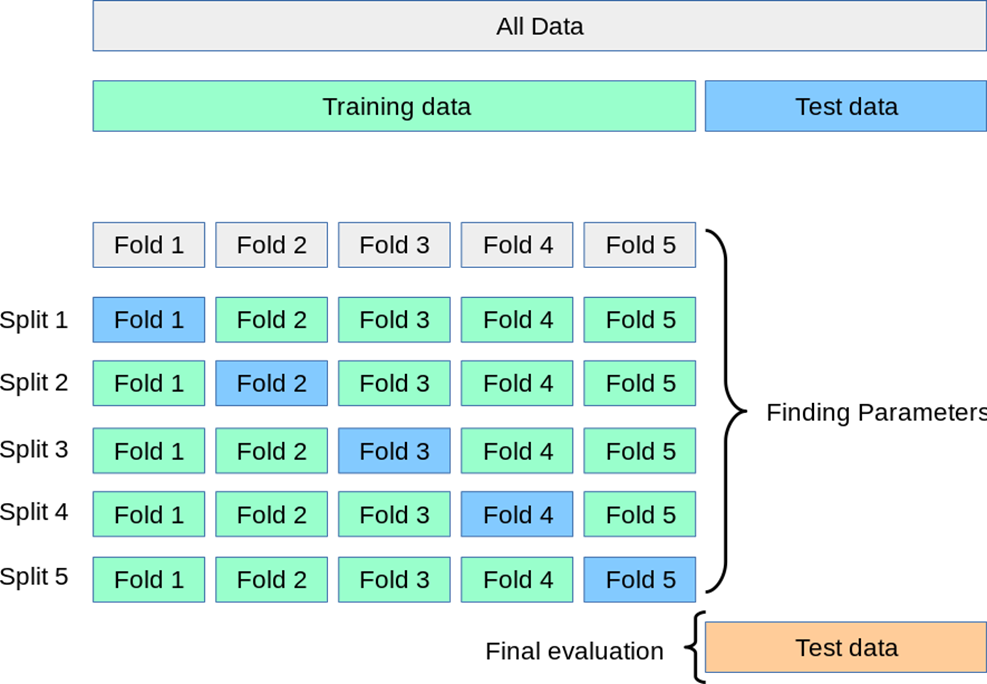

## Подбор гиперпараметров

### GridSearch

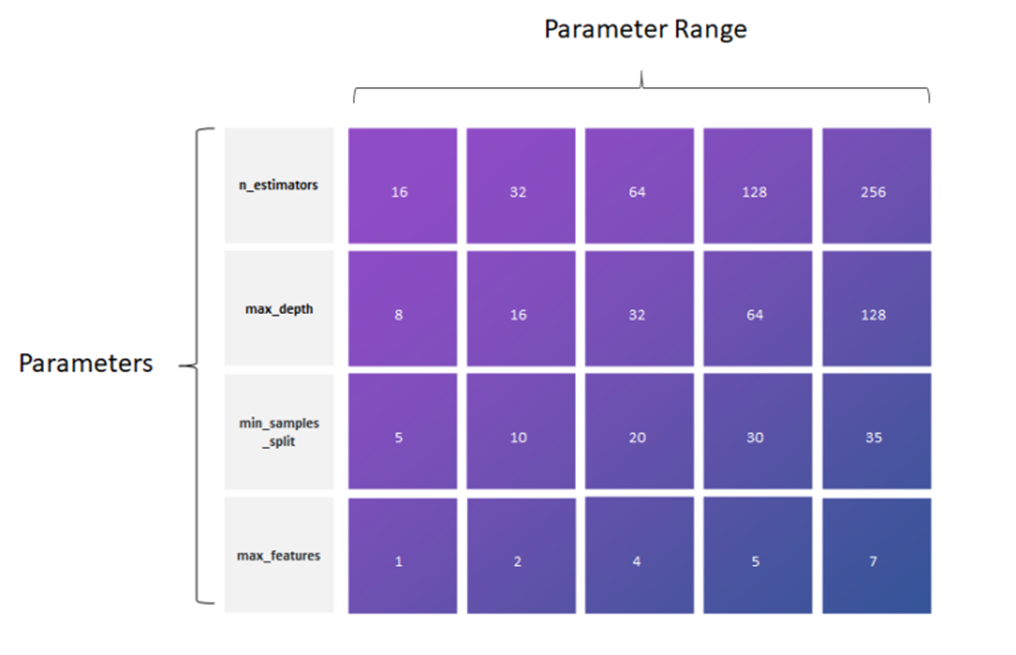

In [5]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [6]:
#загрузка датасета
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=42)
#определяем классификатор
pipeline = Pipeline([('clf', LogisticRegression())])

In [7]:
#сетка параметров
parameters = {'clf__C':[1, 2, 3, 4, 5],
              'clf__penalty': ['l2'],
              'clf__solver':['liblinear', 'newton-cg']
              }

grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = parameters,
    cv = 5,
    )

In [8]:
%%time
grid_search.fit(X_train, y_train)

CPU times: user 654 ms, sys: 17 ms, total: 671 ms
Wall time: 764 ms


GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', LogisticRegression())]),
             param_grid={'clf__C': [1, 2, 3, 4, 5], 'clf__penalty': ['l2'],
                         'clf__solver': ['liblinear', 'newton-cg']})

In [9]:
#лучшие параметры классификатора
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print(f'{param_name}: {best_parameters[param_name]}')

clf__C: 1
clf__penalty: l2
clf__solver: newton-cg


In [10]:
#тестирование
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        19
           1     1.0000    1.0000    1.0000        13
           2     1.0000    1.0000    1.0000        13

    accuracy                         1.0000        45
   macro avg     1.0000    1.0000    1.0000        45
weighted avg     1.0000    1.0000    1.0000        45



### RandomizedSearch

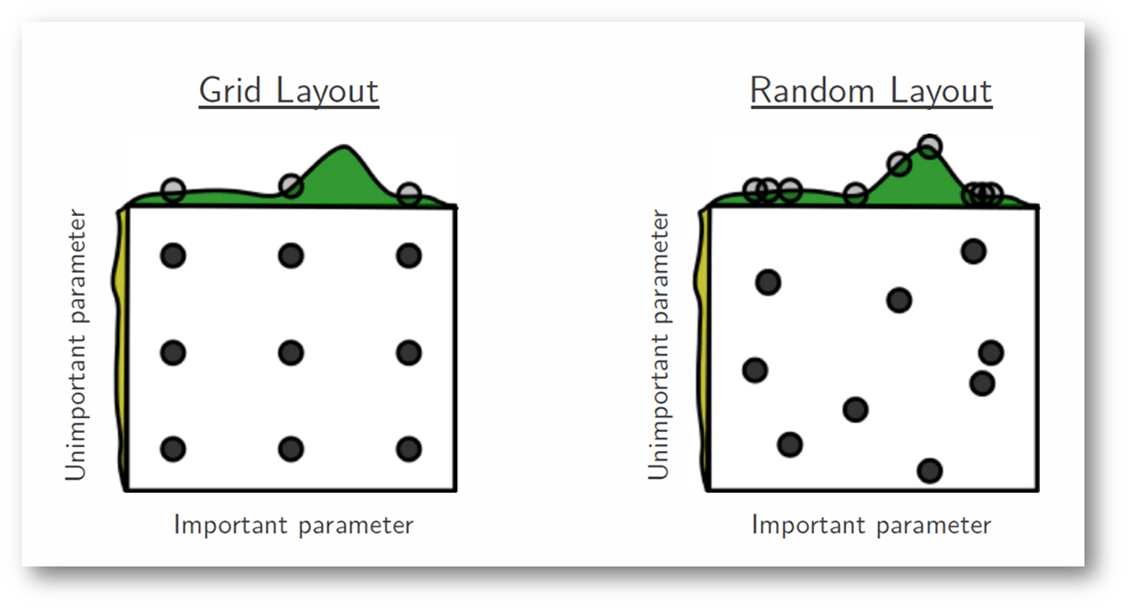

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
#загрузка датасета
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=42)
#определяем классификатор
pipeline = Pipeline([('clf', LogisticRegression())])

In [13]:
#сетка параметров
parameters = {'clf__C':[1, 2, 3, 4, 5],
              'clf__penalty': ['l2'],
              'clf__solver':['liblinear', 'newton-cg']
              }

random_search = RandomizedSearchCV(
    estimator = pipeline,
    param_distributions = parameters,
    n_iter = 10,
    random_state = 2023,
    cv = 5,
    )

In [14]:
%%time
random_search.fit(X_train, y_train)

CPU times: user 660 ms, sys: 6.92 ms, total: 667 ms
Wall time: 707 ms


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('clf', LogisticRegression())]),
                   param_distributions={'clf__C': [1, 2, 3, 4, 5],
                                        'clf__penalty': ['l2'],
                                        'clf__solver': ['liblinear',
                                                        'newton-cg']},
                   random_state=2023)

In [15]:
#лучшие параметры классификатора
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print(f'{param_name}: {best_parameters[param_name]}')

clf__C: 1
clf__penalty: l2
clf__solver: newton-cg


In [16]:
#тестирование
y_pred = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        19
           1     1.0000    1.0000    1.0000        13
           2     1.0000    1.0000    1.0000        13

    accuracy                         1.0000        45
   macro avg     1.0000    1.0000    1.0000        45
weighted avg     1.0000    1.0000    1.0000        45



### Halving GridSearch

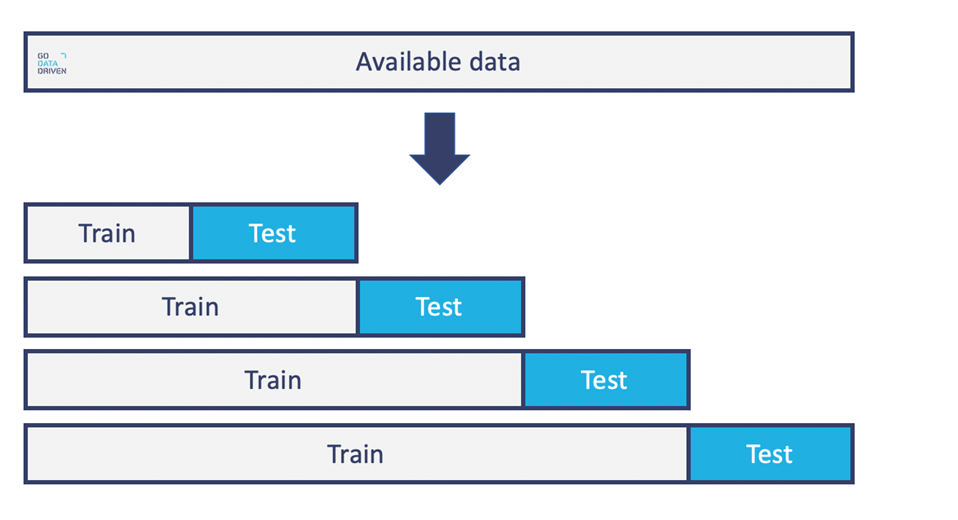

In [17]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [18]:
#загрузка датасета
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.30, random_state=42)
#определяем классификатор
pipeline = Pipeline([('clf', LogisticRegression())])

In [19]:
#сетка параметров
parameters = {'clf__C':[1, 2, 3, 4, 5],
              'clf__penalty': ['l2'],
              'clf__solver':['liblinear', 'newton-cg']
              }

halving_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv = 5,
    factor=1.2,
    random_state=0,
)

In [20]:
%%time

halving_search.fit(X_train, y_train)

CPU times: user 3.23 s, sys: 44.3 ms, total: 3.27 s
Wall time: 3.38 s


HalvingGridSearchCV(estimator=Pipeline(steps=[('clf', LogisticRegression())]),
                    factor=1.2,
                    param_grid={'clf__C': [1, 2, 3, 4, 5],
                                'clf__penalty': ['l2'],
                                'clf__solver': ['liblinear', 'newton-cg']},
                    random_state=0)

In [21]:
best_parameters = halving_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

clf__C: 4
clf__penalty: l2
clf__solver: liblinear


In [22]:
y_pred_optimized = halving_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_optimized))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [23]:
import matplotlib.pyplot as plt
import pandas as pd

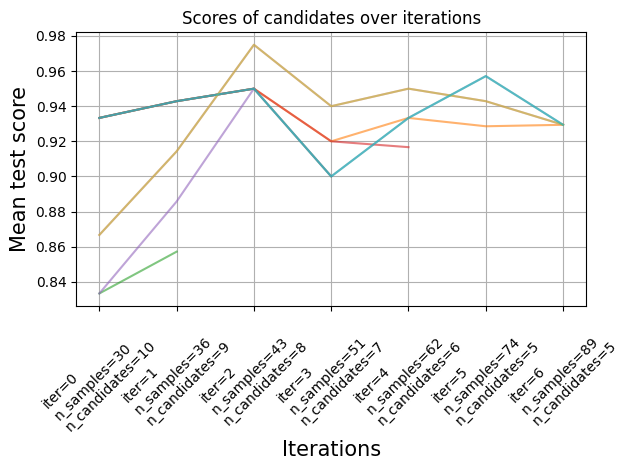

In [24]:
results = pd.DataFrame(halving_search.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter",
    columns="params_str",
     values="mean_test_score",
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={halving_search.n_resources_[i]}\nn_candidates={halving_search.n_candidates_[i]}"
    for i in range(halving_search.n_iterations_)
]

ax.set_xticks(range(halving_search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("Mean test score", fontsize=15)
ax.set_xlabel("Iterations", fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

## Тестирование системы

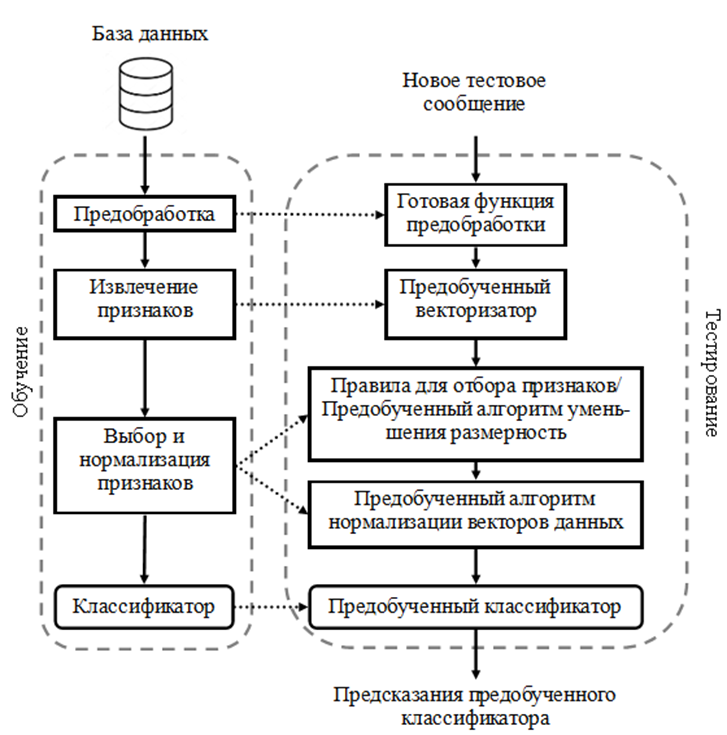

1. Взять любой текст нового поста
2. Предобработать его той же функцией предобработки
3. Извлечь вектор из текста, используя тот же метод векторизации, что и при обучении (предобученный BoW/TF-IDF или ту же модель Word2Vec)
4. Попросить **предобученный** классификатор предсказать популярность вашего поста (функция predict)
5. Получить результат, отражающий популярность вашего поста

# Лабораторная работа 7

1. Взять любые вектора
2. Взять наилучший классификатор из предыдущей лабы
3. Подобрать к нему гиперпараметры любым методом
4. Выполнить предсказания популярности нового поста